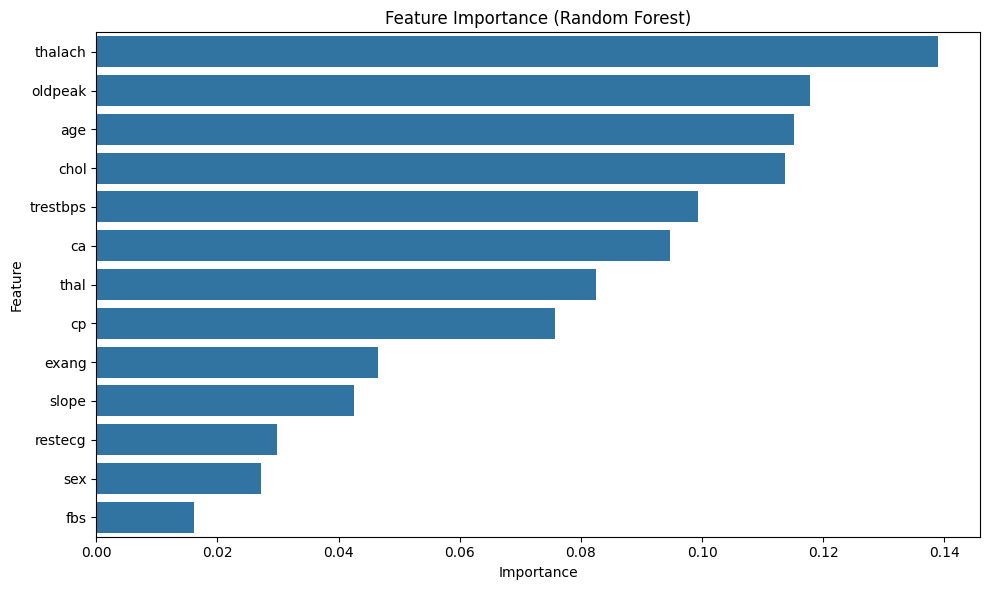

Selected Features by RFE:
Index(['cp', 'restecg', 'oldpeak', 'ca', 'thal'], dtype='object')

RFE Ranking Table:
     Feature  Selected  Ranking
2         cp      True        1
6    restecg      True        1
11        ca      True        1
9    oldpeak      True        1
12      thal      True        1
7    thalach     False        2
5        fbs     False        3
10     slope     False        4
1        sex     False        5
0        age     False        6
8      exang     False        7
3   trestbps     False        8
4       chol     False        9
Chi-Square Feature Scores:
     Feature  Chi2 Score
12      thal  192.764587
8      exang  156.476728
11        ca  154.058016
9    oldpeak   86.787258
10     slope   54.133277
1        sex   30.046584
2         cp   30.024657
5        fbs   27.113845
6    restecg   26.052867
7    thalach   19.329907
0        age    7.905549
3   trestbps    4.224460
4       chol    1.641075
Reduced dataset shape: (297, 5)


C:\Users\20155\AppData\Local\Temp\ipykernel_25576\978285402.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Chi2 Score', y='Feature', data=chi2_scores, palette='viridis')


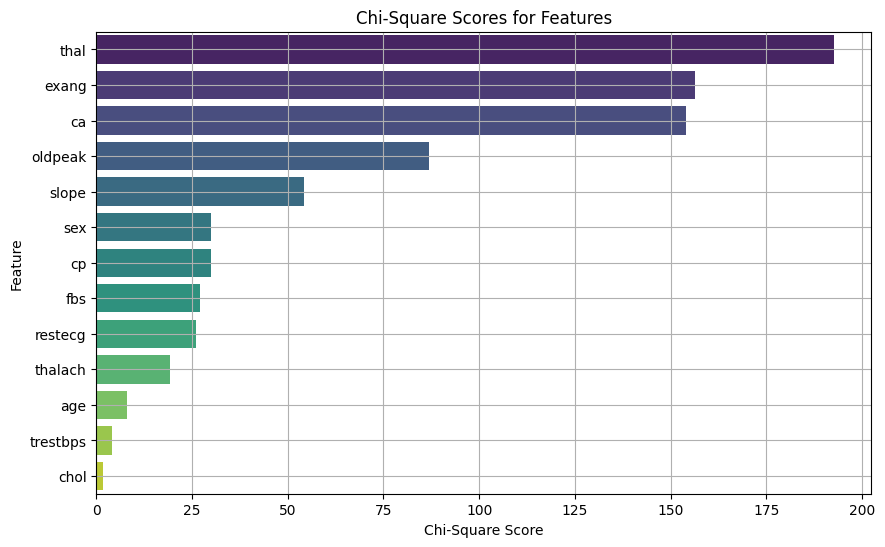

Selected features dataset saved.


C:\Users\20155\AppData\Local\Temp\ipykernel_25576\978285402.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected['target'] = y.values


In [12]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt
import seaborn as sns

columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

df = pd.read_csv("../data/heart_disease.csv", header=None)
df.columns = columns
df = df.replace('?', np.nan)
df = df.dropna()
df[['ca', 'thal']] = df[['ca', 'thal']].astype(float)

X = df.drop("target", axis=1)
y = df["target"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, y)

importances = rf.feature_importances_
feature_names = X.columns

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X_scaled, y)

selected_features = X.columns[rfe.support_]
rfe_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Selected': rfe.support_,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')

print("Selected Features by RFE:")
print(selected_features)
print("\nRFE Ranking Table:")
print(rfe_ranking)

discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_binned = discretizer.fit_transform(X)

chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X_binned, y)

chi2_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi2_selector.scores_
}).sort_values(by='Chi2 Score', ascending=False)

print("Chi-Square Feature Scores:")
print(chi2_scores)

selected_features = ['cp', 'thal', 'ca', 'oldpeak', 'chol']
X_selected = X[selected_features]

print("Reduced dataset shape:", X_selected.shape)

plt.figure(figsize=(10, 6))
sns.barplot(x='Chi2 Score', y='Feature', data=chi2_scores, palette='viridis')
plt.title('Chi-Square Scores for Features')
plt.xlabel('Chi-Square Score')
plt.ylabel('Feature')
plt.grid(True)
plt.show()


X_selected['target'] = y.values
X_selected.to_csv("../data/heart_disease_selected_features.csv", index=False)
print("Selected features dataset saved.")
